<h1> Stat504 Project: Personal Financial distress in the next two years </h1><br>
<b> University Of Idaho<br>
Chung Yan Wan <br>
12/13/2015</b>

<h2>Abstract</h2><br>
The goal of this project is to find the variables and model that would best predict whether an individual would or would not experience financial distress in the following two years, given his or her personal and financial information. Building the best model possible is important to banks and credit unions to predict their future returns from financing. It will also be useful for them on future planning for monetary resource allocations. The first part of this project was to evaluate models without feature selection. 10-fold cross-validation would be used for parameter tuning for some of the models and model evaluations. The second part of this project was to find the importance of each feature using the best performing model, and to conduct model evaluations with feature selection if necessary. A total of eight models were used in this project and they were listed as follows, <br>
1. Gaussian Naive Bayes<br>
2. Logistic Regression <br>
3. Decision Tree <br>
4. (a) Ensemble Bagging (Decision Tree as Base Estimator)<br>
(b) Ensemble Bagging (GNB as Base Estimator)<br>
5. Ensemble Random Forest<br>
6. Knn <br>
7. SVM Gassian Kernel <br>
8. Ensemble Voting Classifier

It turned out that Random Forest was the best performing model yielding the highest accuracy and AUC, and results showed that no feature selection was necessary for this dataset.  

<h2>Data Source and data description</h2><br>
This dataset is originally posted on https://www.kaggle.com/c/GiveMeSomeCredit/data in 2011. It was collected from 150,000 borrowers who borrowed loans from banks in previous years. There are 11 variables and 150,000 observations in this dataset. The variables are defined as follows, 

<b>Response Variable:</b>
1. SeriousDlqin2yrs - Person experienced 90 days past due delinquency or worse (0 or 1) 

<b>Independent Variables:</b>
1. RevolvingUtilizationOfUnsecuredLines - Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits (integer) <br>
3. Age - Age of borrower in years (integer) <br>
4. NumberOfTime30-59DaysPastDueNotWorse - Number of times borrower has been 30-59 days past due but no worse in the last 2 years (integer)<br>
5. DebtRatio - Monthly debt payments, alimony,living costs divided by monthy gross income (percentage)<br>
6. MonthlyIncome - Monthly income (real) <br>
7. NumberOfOpenCreditLinesAndLoans - Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) (integer) <br>
8. NumberOfTimes90DaysLate - Number of times borrower has been 90 days or more past due (integer) <br>
9. NumberRealEstateLoansOrLines - Number of mortgage and real estate loans including home equity lines of credit (integer)<br>
10. NumberOfTime60-89DaysPastDueNotWorse - Number of times borrower has been 60-89 days past due but no worse in the last 2 years (integer) <br>
11. NumberOfDependents - Number of dependents in family excluding themselves (spouse, children etc.) (integer)

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
import json
from pprint import pprint
import StringIO
from IPython.display import Image
from sklearn.feature_extraction.text import CountVectorizer
#this module cannot be imported on a Mac, so model 8 Voting Classifier can only be reproduced on Windows or Linux
from sklearn.ensemble import VotingClassifier  
import urllib
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
from astropy.table import Table, Column
from sklearn.feature_selection import VarianceThreshold

<h3> Import the data </h3>

In [2]:
data = pd.read_csv('C:\Users\Joanne Wan\Desktop\project\finance_data.csv')
data.head()

,,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
1,2,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
2,3,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
3,4,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
4,5,0,0.907239,49,1,0.024926,63588,7,0,1,0,0


<h3>Information about the data (some values are missing)</h3>

In [3]:
print type(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 12 columns):
                                        150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 14.9 MB


In [4]:
print data.describe().transpose()

                                       count          mean           std  min  \
                                      150000  75000.500000  43301.414527    1   
SeriousDlqin2yrs                      150000      0.066840      0.249746    0   
RevolvingUtilizationOfUnsecuredLines  150000      6.048438    249.755371    0   
age                                   150000     52.295207     14.771866    0   
NumberOfTime30-59DaysPastDueNotWorse  150000      0.421033      4.192781    0   
DebtRatio                             150000    353.005076   2037.818523    0   
MonthlyIncome                         120269   6670.221237  14384.674215    0   
NumberOfOpenCreditLinesAndLoans       150000      8.452760      5.145951    0   
NumberOfTimes90DaysLate               150000      0.265973      4.169304    0   
NumberRealEstateLoansOrLines          150000      1.018240      1.129771    0   
NumberOfTime60-89DaysPastDueNotWorse  150000      0.240387      4.155179    0   
NumberOfDependents          

In [5]:
#drop any row that has missing values
data = data.dropna()
#drop the index column
data = data.drop(data.columns[0], axis=1)
data.shape

(120269, 11)

<h3>Graphical visualizations of the data </h3>

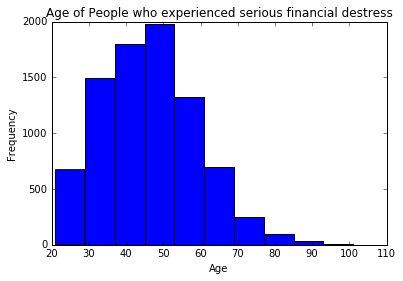

In [6]:
%matplotlib inline
plt.hist(data[data['SeriousDlqin2yrs'] ==1]['age'])
plt.title("Age of People who experienced serious financial destress")
plt.xlabel("Age")
plt.ylabel("Frequency")

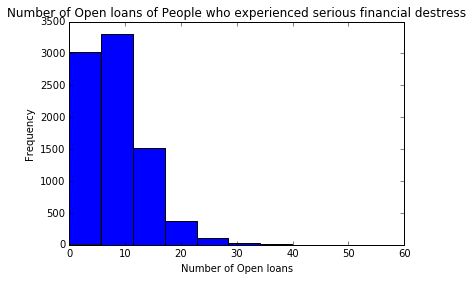

In [7]:
%matplotlib inline
plt.hist(data[data['SeriousDlqin2yrs'] ==1]['NumberOfOpenCreditLinesAndLoans'])
plt.title("Number of Open loans of People who experienced serious financial destress")
plt.xlabel("Number of Open loans")
plt.ylabel("Frequency")

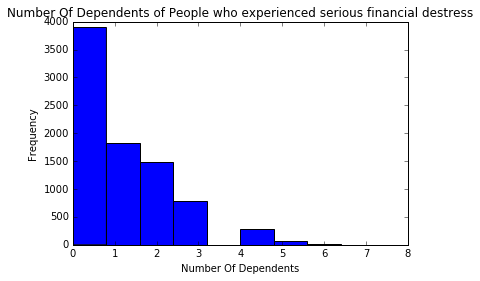

In [8]:
%matplotlib inline
plt.hist(data[data['SeriousDlqin2yrs'] ==1]['NumberOfDependents'])
plt.title("Number Of Dependents of People who experienced serious financial destress")
plt.xlabel("Number Of Dependents")
plt.ylabel("Frequency")
#plt.xlim([0.0, 3000.0])

<h3> Set up subsets X and y, and split them into train and test</h3>

In [9]:
feature_cols = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 
                'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate',
                'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
X = data[feature_cols]
y = data['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234567)

<h3>Null Model</h3>

In [49]:
#null model and its accuracy
distress_y = np.count_nonzero(y)
print 'Number of people who have financial distress: %d' %distress_y
# total observation is 120269, and distress_y = 8357, so the null model is all zeros. 
null_ypred = np.ones(120269)
null_score = 1 - 8357/120269.0
print ('Null model accuracy: %f' %null_score)
null_auc = metrics.roc_auc_score(y, null_ypred)
print ('Null model AUC: %f' %null_auc)

Number of people who have financial distress: 8357
Null model accuracy: 0.930514
Null model AUC: 0.500000


<h2>Part 1: Model Evaluations without Feature Selection </h2>
<h3>Model 1: Gaussian Naive Bayes</h3><br>
<b> Average accuracy and AUC </b>

In [50]:
# 10-fold cross-validation for GaussianNB 
m1_start = time.time()
gnb = GaussianNB()
m1_scores = cross_val_score(gnb, X, y, cv=10, scoring='accuracy')
# use average accuracy as an estimate of out-of-sample accuracy
print ("Gaussian NB average accracy: %f" %m1_scores.mean())
m1_auc = cross_val_score(gnb, X, y, cv=10, scoring='roc_auc')
print ("Gaussian NB average AUC: %f" %m1_auc.mean())
m1_end = time.time()
m1_time = m1_end - m1_start 
print ("Computation time (in second): %f"
      % m1_time)

Gaussian NB average accracy: 0.929466
Gaussian NB average AUC: 0.717931
Computational time (in second): 2.899693


<h3> Model 2: Logistcl Regression </h3><br>
<b> Average accuracy and AUC </b>

In [51]:
#10-fold cross-validation for logreg
m2_start = time.time()
logreg = LogisticRegression(C=1e9)
m2_scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
# use average accuracy as an estimate of out-of-sample accuracy
print ("Logistic regression average accracy: %f" %m2_scores.mean())
m2_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print ("Logistic regression average auc: %f" %m2_auc.mean())
m2_end = time.time()
m2_time = m2_end - m2_start 
print ("Computation time (in second): %f" % m2_time)

Logistic regression average accracy: 0.930805
Logistic regression average auc: 0.676303
Computational time (in second): 26.495750


<h3>Model 3: Decision Tree Classifier </h3><br>
<b>Parameter tunning: max_depth </b>

In [52]:
# search for an optimal value of max_depth for treeclf
tune1_start = time.time()
d_range = range(1,30)
d_scores = []
for d in d_range:
    treeclf = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(treeclf, X, y, cv=10, scoring='accuracy')
    d_scores.append(scores.mean())
tune1_end = time.time()
print "Computation time : %f" % (tune1_end - tune1_start)
print "Index of the best score:" 
np.where(d_scores == max(d_scores))

Computational time : 244.110826
Index of the best score:


(array([4]),)

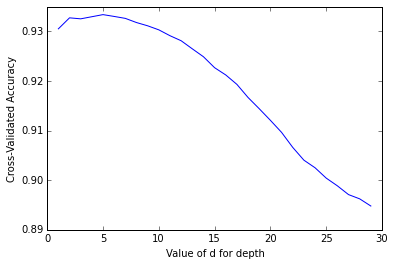

In [53]:
%matplotlib inline
# plot the value of d for treeclf (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(d_range, d_scores)
plt.xlabel('Value of d for depth')
plt.ylabel('Cross-Validated Accuracy')

<b> Average accuracy and AUC </b>

In [131]:
# 10-fold cross-validation for Decision Tree with the optimal max depth (previously found max_depth=4)
m3_start = time.time()
treeclf = DecisionTreeClassifier(max_depth = 5)
m3_scores = cross_val_score(treeclf, X, y, cv=10, scoring='accuracy').mean()
# use average accuracy as an estimate of out-of-sample accuracy
print ("Decision Tree average accuracy: %f" % m3_scores.mean())
m3_auc = cross_val_score(treeclf, X, y, cv=10, scoring='roc_auc')
print ("Decision Tree average AUC: %f" % m3_auc.mean())
m3_end = time.time()
m3_time = m3_end - m3_start
print ("Computation time (in second): %f" % m3_time)

Decision Tree average accuracy: 0.933383
Decision Tree averageAUC: 0.831738
Computation time (in second): 7.848564


<h3> Model 4.1: Ensemble Bagging (use Decision Tree as base estimator)</h3>

<b> Parameter tuning: n_estimator and max_samples </b>

In [81]:
# search for an optimal values of n_estimator and max_samples for bagging
tune4_start = time.time()
est_range = range(1,21)  
sam_range = range(100,2001,100)
tune4_scores = np.empty(shape=[20,20])
i = 0
for est in est_range:
    for sam in sam_range:
        bag = BaggingClassifier(n_estimators=est, max_samples=sam)
        scores = cross_val_score(bag, X, y, cv=10, scoring='accuracy')
        tune4_scores[est-1, i] = scores.mean()
        i = i+1
    i = 0
tune4_end = time.time()
print ("Computation time : %f" % (tune4_end - tune4_start))
print "Index of the best score: "
np.where(tune4_scores == tune4_scores.max())

Computational time : 1347.007179
Index of the best score: 


(array([19]), array([18]))

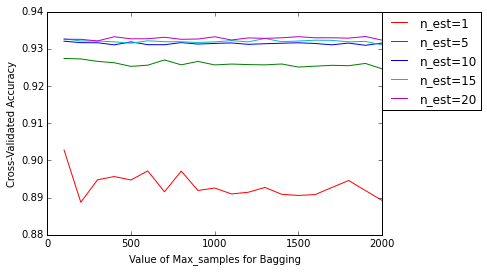

In [82]:
%matplotlib inline
# plot the value of max_samples for bagging (x-axis) versus the cross-validated accuracy (y-axis)
# each line represents a different value of n_estimators
plt.plot(sam_range, tune4_scores[0,:],'r', label ='n_est=1')
plt.plot(sam_range, tune4_scores[4,:],'g',label = 'n_est=5')
plt.plot(sam_range, tune4_scores[9,:],'b',label = 'n_est=10')
plt.plot(sam_range, tune4_scores[14,:],'c', label ='n_est=15')
plt.plot(sam_range, tune4_scores[19,:],'m',label = 'n_est=20')
plt.xlabel('Value of Max_samples for Bagging')
plt.ylabel('Cross-Validated Accuracy')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

<b> Average accuracy and AUC </b>

In [84]:
# 10-fold cross-validation for Bagging using Decision Tree as the base estimator 
# previously found n_estimators=20, max_samples=1900
m4a_start = time.time()
bag = BaggingClassifier(n_estimators=20, max_samples=1900)
m4a_scores = cross_val_score(bag, X, y, cv=10, scoring='accuracy').mean()
# use average accuracy as an estimate of out-of-sample accuracy
print ("Bagging average acurracy: %f" % m4a_scores.mean())
m4a_auc = cross_val_score(bag, X, y, cv=10, scoring='roc_auc')
print ("Bagging average AUC: %f" % m4a_auc.mean())
m4a_end = time.time()
m4a_time = m4a_end - m4a_start
print ("Computation time (in second): %f" % m4a_time)

Bagging average acurracy: 0.932659
Bagging average AUC: 0.811993
Computation time (in second): 14.602276


<h3> Model 4.2: Ensemble Bagging (use Gaussian NB as base estimator)</h3>

<b> Parameter tuning: n_estimator and max_samples  </b>

In [25]:
# search for an optimal values of n_estimator and max_samples for bagging using GNB as the base estimator 
# the accuracy didn't look right! All of them are about zero???!!!
tune4b_start = time.time()
gnb = GaussianNB()
est_range = range(1,21)  
sam_range = (1,100,200,300,400,500)
tune4b_scores = np.empty(shape=[20,6])
i = 0
for est in est_range:
    for sam in sam_range:
        bag = BaggingClassifier(base_estimator= gnb, n_estimators=est, max_samples=sam)
        scores = cross_val_score(bag, X, y, cv=10, scoring='accuracy')
        tune4b_scores[est-1, i] = scores.mean()
        i = i+1
    i = 0
tune4b_end = time.time()
print ("Computation time : %f" % (tune4b_end - tune4b_start))
print "Index of the best score: "
np.where(tune4b_scores == tune4b_scores.max())

Computation time : 922.940000
Index of the best score: 


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

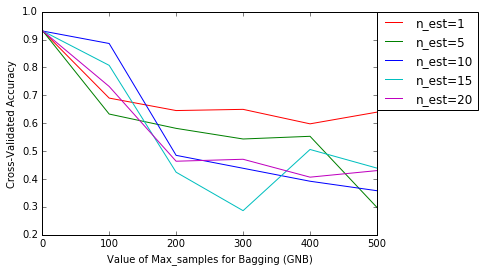

In [26]:
%matplotlib inline
# plot the value of max_samples for bagging (x-axis) versus the cross-validated accuracy (y-axis)
# each line represents a different value of n_estimators
plt.plot(sam_range, tune4b_scores[0,:],'r', label ='n_est=1')
plt.plot(sam_range, tune4b_scores[4,:],'g',label = 'n_est=5')
plt.plot(sam_range, tune4b_scores[9,:],'b',label = 'n_est=10')
plt.plot(sam_range, tune4b_scores[14,:],'c', label ='n_est=15')
plt.plot(sam_range, tune4b_scores[19,:],'m',label = 'n_est=20')
plt.xlabel('Value of Max_samples for Bagging (GNB)')
plt.ylabel('Cross-Validated Accuracy')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

<b> Average accuracy and AUC </b>

In [27]:
# 10-fold cross-validation for Bagging using GNB as the base estimator 
# we will use the default parameters 
m4b_start = time.time()
gnb = GaussianNB()
bag2 = BaggingClassifier(base_estimator=gnb)
m4b_scores = cross_val_score(bag2, X, y, cv=10, scoring='accuracy').mean()
# use average accuracy as an estimate of out-of-sample accuracy
print ("Bagging (GNB) average acurracy: %f" % m4b_scores.mean())
m4b_auc = cross_val_score(bag2, X, y, cv=10, scoring='roc_auc')
print ("Bagging (GNB) average AUC: %f" % m4b_auc.mean())
m4b_end = time.time()
m4b_time = m4b_end - m4b_start
print ("Computation time (in second): %f" % m4b_time)

Bagging (GNB) average acurracy: 0.929832
Bagging (GNB) average AUC: 0.719633
Computation time (in second): 16.261000


<h3> Model 5: Ensemble Random Forest </h3>

<b>Parameter tuning: n_estimator and max_depth</b>

In [96]:
# search for an optimal values of n_estimator and max_depth for Random Forest Classifier 
tune5_start = time.time()
est_range = range(1,16)
dep_range = range(1,16)
tune5_scores = np.empty(shape=[15,15])
for est in est_range:
    for dep in dep_range:
        rfc = RandomForestClassifier(n_estimators=est, max_depth=dep)
        scores = cross_val_score(rfc, X, y, cv=10, scoring='accuracy')
        tune5_scores[est-1, dep-1] = scores.mean()
tune5_end = time.time()
print ("Computation time : %f" % (tune5_end - tune5_start))
print "Index of the best score: "
np.where(tune5_scores == tune5_scores.max())

Computational time : 2282.234968
Index of the best score: 


(array([13]), array([7]))

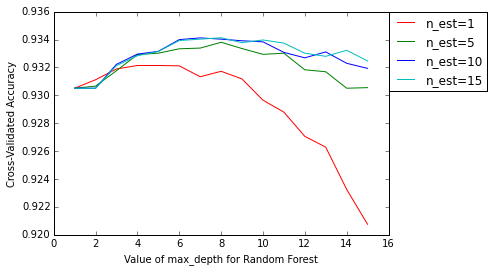

In [97]:
%matplotlib inline
# plot the value of max_samples for bagging (x-axis) versus the cross-validated accuracy (y-axis)
# each line represents a different value of n_estimators
plt.plot(dep_range, tune5_scores[0,:],'r', label ='n_est=1')
plt.plot(dep_range, tune5_scores[4,:],'g',label = 'n_est=5')
plt.plot(dep_range, tune5_scores[9,:],'b',label = 'n_est=10')
plt.plot(dep_range, tune5_scores[14,:],'c', label ='n_est=15')
plt.xlabel('Value of max_depth for Random Forest')
plt.ylabel('Cross-Validated Accuracy')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

<b> Average accuracy and AUC </b>

In [142]:
# 10-fold cross-validation for Bagging
# previously found best n_estimator = 14, max_depth = 8
m5_start = time.time()
rfc = RandomForestClassifier(n_estimators=14, max_depth=8)
m5_scores = cross_val_score(rfc, X, y, cv=10, scoring='accuracy').mean()
# use average accuracy as an estimate of out-of-sample accuracy
print ("Random Forest average scores: %f" % m5_scores.mean())
m5_auc = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print ("Random Forest AUC: %f" % m5_auc.mean())
m5_end = time.time()
m5_time = m5_end - m5_start
print ("Computation time (in second): %f" % m5_time)

Random Forest average scores: 0.934048
Random Forest AUC: 0.851587
Computation time (in second): 35.121206


<h3> Model 6: K Nearest Neighbor</h3><br>
<b>Parameter tuning: k </b>

In [99]:
# search for an optimal value of K for KNN
tune6_start = time.time()
k_range = range(1, 140)
tune6_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    tune6_scores.append(scores.mean())
tune6_end = time.time()
print ("Computation time: %f" % (tune6_end - tune6_start))
print "Index of the best score:"
np.where(tune6_scores == max(tune6_scores))

Computation time: 2493.534561
Index of the best score:


(array([24]),)

(array([24]),)

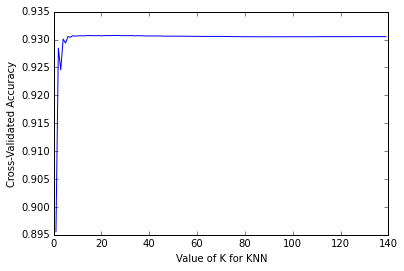

In [100]:
%matplotlib inline
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, tune6_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
np.where(tune6_scores == max(tune6_scores))

<b> Average accuracy and AUC </b>

In [101]:
#previously found optimal k = 25
m6_start = time.time()
knn = KNeighborsClassifier(n_neighbors=25)
m6_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
# use average accuracy as an estimate of out-of-sample accuracy
print ("Knn average accuracy: %f" %m6_scores.mean())
m6_auc = cross_val_score(knn, X, y, cv=10, scoring='roc_auc')
print ("knn average AUC: %f" %m6_auc.mean())
m6_end = time.time()
m6_time = m6_end - m6_start 
print ("Computation time (in second): %f" % m6_time)

Knn average accuracy: 0.930722
knn average AUC: 0.609942
Computation time (in second): 37.716885


<h3> Model 7: SVM Gaussian Kernel </h3><br>
<b> Parameter tuning: Gamma</b>

In [ ]:
#parameter tuning hasn't been computed, it should take a LONG time
tune7_start = time.time()
gamma_range = [.1,1,5,10]
tune7_scores = []
for g in gamma_range:
    svm_rbf = svm.SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svm_rbf, X, y, cv=10, scoring='accuracy')
    tune7_scores.append(scores.mean())
tune7_end = time.time()
print ("Computation time: %f"
      % tune7_end - tune7_start)

In [ ]:
%matplotlib inline
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range, tune7_scores)
plt.xlabel('Value of gamma for SVM Gaussian')
plt.ylabel('Cross-Validated Accuracy')

<b> Average accuracy and AUC </b>

In [ ]:
#10-fold cross-validation for SVM Gaussian
#I used the default parameter
m7_start = time.time()
svm_rbf = svm.SVC(kernel='rbf')
m7_scores = cross_val_score(svm_rbf, X, y, cv=10, scoring='accuracy')
# use average accuracy as an estimate of out-of-sample accuracy
print ("SVM Gaussian average accuracy: %f" %m7_scores.mean())
m7_auc = cross_val_score(svm_rbf, X, y, cv=10, scoring='roc_auc')
print ("SVM Gaussian average AUC: %f" %m7_auc.mean())
m7_end = time.time()
m7_time = m7_end - m7_start 
print ("Computation time (in second): %f" % m7_time)

<u>Note:</u><br>
Due to extremely long run time, this model was compiled on a different computer and the output was attached here. <br>
SVM Gaussian average accuracy: 0.930431<br>
SVM Gaussian average AUC: 0.633914<br>
Computational time (in second): 69664.545000<br>

<h3> Model 8: Ensemble Voting Classifier</h3>

<b> Average accuracy and AUC </b>

In [34]:
m8_start = time.time()
clf1 = DecisionTreeClassifier(max_depth = 5)
clf2 = RandomForestClassifier(n_estimators=14, max_depth=8)
clf3 = BaggingClassifier(n_estimators=20, max_samples=1900)
eclf = VotingClassifier(estimators=[('treeclf', clf1), ('rf', clf2), ('bag', clf3)], voting='soft')
m8_scores = cross_val_score(eclf, X, y, cv=10, scoring='accuracy').mean()
# use average accuracy as an estimate of out-of-sample accuracy
print ("Voting Classifier average scores: %f" % m8_scores.mean())
m8_auc = cross_val_score(eclf, X, y, cv=10, scoring='roc_auc')
print ("Voting Classifier AUC: %f" % m8_auc.mean())
m8_end = time.time()
m8_time = m8_end - m8_start
print ("Computation time (in second): %f" % m8_time)

Voting Classifier average scores: 0.934380
Voting Classifier AUC: 0.846406
Computation time (in second): 51.156000


<h3> Compare the ROC Curves</h3>

In [29]:
start1 = time.time()
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_y_pred_prob = gnb.predict_proba(X_test)[:, 1]
gnb_fpr, gnb_tpr, gnb_thresholds = metrics.roc_curve(y_test, gnb_y_pred_prob)
print 'Gaussian Naive Bayes AUC: ', metrics.roc_auc_score(y_test, gnb_y_pred_prob)
end1 = time.time()
run1 = end1 - start1
print ("Computation time: %f" %run1 )

start2 = time.time()
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train,y_train)
lr_y_pred_prob = logreg.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, lr_thresholds = metrics.roc_curve(y_test, lr_y_pred_prob)
print 'Logistic Regression AUC: ', metrics.roc_auc_score(y_test, lr_y_pred_prob)
end2 = time.time()
run2 = end2 - start2
print ('Computation time: %f' %run2)

start3 = time.time()
treeclf = DecisionTreeClassifier(max_depth = 5)
treeclf.fit(X_train,y_train)
ct_y_pred_prob = treeclf.predict_proba(X_test)[:, 1]
ct_fpr, ct_tpr, ct_thresholds = metrics.roc_curve(y_test, ct_y_pred_prob)
print 'Decision Tree AUC: ', metrics.roc_auc_score(y_test, ct_y_pred_prob)
end3 = time.time()
run3 = end3 - start3
print ('Computation time: %f' %run3)

start4a = time.time()
bag = BaggingClassifier(n_estimators=20, max_samples=1900)
bag.fit(X_train,y_train)
bag1_y_pred_prob = bag.predict_proba(X_test)[:, 1]
bag1_fpr, bag1_tpr, bag1_thresholds = metrics.roc_curve(y_test, bag1_y_pred_prob)
print 'Bagging 1 AUC: ', metrics.roc_auc_score(y_test, bag1_y_pred_prob)
end4a = time.time()
run4a = end4a - start4a
print ('Computation time: %f' %run4a)

start4b = time.time()
gnb = GaussianNB()
bag2 = BaggingClassifier(base_estimator=gnb)
bag2.fit(X_train,y_train)
bag2_y_pred_prob = bag2.predict_proba(X_test)[:, 1]
bag2_fpr, bag2_tpr, bag2_thresholds = metrics.roc_curve(y_test, bag2_y_pred_prob)
print 'Bagging 2 AUC: ', metrics.roc_auc_score(y_test, bag2_y_pred_prob)
end4b = time.time()
run4b = end4b - start4b
print ('Computation time: %f' %run4b)

Gaussian Naive Bayes AUC:  0.71872021475
Computation time: 0.079000
Logistic Regression AUC:  0.681014635488
Computation time: 1.574000
Decision Tree AUC:  0.824038609957
Computation time: 0.347000
Bagging 1 AUC:  0.808001412568
Computation time: 0.626000
Bagging 2 AUC:  0.71752213558
Computation time: 0.689000


In [32]:
start5 = time.time()
rfc = RandomForestClassifier(n_estimators=14, max_depth=8)
rfc.fit(X_train,y_train)
rf_y_pred_prob = rfc.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve(y_test, rf_y_pred_prob)
print 'Random Forest AUC: ', metrics.roc_auc_score(y_test, rf_y_pred_prob)
end5 = time.time()
run5 = end5 - start5
print ('Computation time: %f' %run5)

start6 = time.time()
knn = KNeighborsClassifier(n_neighbors=25 )
knn.fit(X_train,y_train)
knn_y_pred_prob = knn.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, knn_thresholds = metrics.roc_curve(y_test, knn_y_pred_prob)
print 'Knn AUC: ', metrics.roc_auc_score(y_test, knn_y_pred_prob)
end6 = time.time()
run6 = end6 - start6
print ('Computation time: %f' %run6)

start7 = time.time()
svm_rbf = svm.SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train,y_train)
svm2_y_pred_prob = svm_rbf.predict_proba(X_test)[:, 1]
svm2_fpr, svm2_tpr, svm2_thresholds = metrics.roc_curve(y_test, svm2_y_pred_prob)
print 'SVM Gaussian Kernel AUC: ', metrics.roc_auc_score(y_test, svm2_y_pred_prob)
end7 = time.time()
run7 = end7 - start7
print ('Computation time: %f' %run7)

start8 = time.time()
clf1 = DecisionTreeClassifier(max_depth = 5)
clf2 = RandomForestClassifier(n_estimators=14, max_depth=8)
clf3 = BaggingClassifier(n_estimators=20, max_samples=1900)
eclf = VotingClassifier(estimators=[('treeclf', clf1), ('rf', clf2), ('bag', clf3)], voting='soft')
eclf.fit(X_train,y_train)
vc_y_pred_prob = eclf.predict_proba(X_test)[:, 1]
vc_fpr, vc_tpr, vc_thresholds = metrics.roc_curve(y_test, vc_y_pred_prob)
print 'Voting Classifier AUC: ', metrics.roc_auc_score(y_test, vc_y_pred_prob)
end8 = time.time()
run8 = end8 - start8
print ('Computation time: %f' %run8)

Random Forest AUC:  0.845532366923
Computation time: 1.375000
Knn AUC:  0.604142860609
Computation time: 4.016000
SVM Gaussian Kernel AUC:  0.631741122553
Computation time: 9757.358000
Voting Classifier AUC:  0.840463677069
Computation time: 2.047000


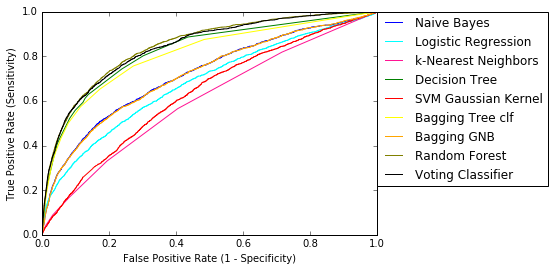

In [36]:
%matplotlib inline
plt.plot(gnb_fpr, gnb_tpr, 'blue', label ='Naive Bayes')
plt.plot(lr_fpr, lr_tpr, 'cyan', label ='Logistic Regression')
plt.plot(knn_fpr, knn_tpr, 'deeppink', label ='k-Nearest Neighbors')
plt.plot(ct_fpr, ct_tpr, 'green', label = 'Decision Tree')
plt.plot(svm2_fpr, svm2_tpr, 'red', label ='SVM Gaussian Kernel')
plt.plot(bag1_fpr, bag1_tpr, 'yellow', label ='Bagging Tree clf')
plt.plot(bag2_fpr, bag2_tpr, 'orange', label ='Bagging GNB')
plt.plot(rf_fpr, rf_tpr, 'olive', label ='Random Forest')
plt.plot(vc_fpr, vc_tpr, 'black' , label ='Voting Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

Random Forest has the greatest AUC! 

<h3> Overview of the Model Performance</h3>

In [13]:
arr = np.array([['Null', 0.930514 , 0.5, '', 0.5, ''],
             ['Gaussian NB', 0.929466, 0.717931, 2.899693, 0.718720, 0.079],
             ['Logistic Regression', 0.930805, 0.676303, 26.495750, 0.681015, 1.574],
             ['Decision Tree', 0.933383, 0.831738, 7.848564, 0.824038, 0.347],
             ['Bagging (Tree)', 0.932659, 0.811993, 14.602276, 0.808001, 0.626],
             ['Bagging (GNB)', 0.929832, 0.719633, 16.261, 0.717522, 0.689],
             ['Rondom Forest', 0.934048, 0.851587, 35.121206, 0.845532, 1.375],
             ['Knn', 0.930722, 0.609942, 37.716885, 0.604143, 4.016],
             ['SVM Gaussian', 0.930431, 0.633914, 69664.545, 0.631741, 9757.358],
            ['Voting Classifier', 0.934380, 0.846406, 51.156, 0.840464, 2.047]])
t = Table(arr, names=('Model', 'CV Accuracy', 'CV AUC', 'CV Time', 'AUC', 'Time'))
print t

       Model        CV Accuracy  CV AUC   CV Time    AUC      Time  
------------------- ----------- -------- --------- -------- --------
               Null    0.930514      0.5                0.5         
        Gaussian NB    0.929466 0.717931  2.899693  0.71872    0.079
Logistic Regression    0.930805 0.676303  26.49575 0.681015    1.574
      Decision Tree    0.933383 0.831738  7.848564 0.824038    0.347
     Bagging (Tree)    0.932659 0.811993 14.602276 0.808001    0.626
      Bagging (GNB)    0.929832 0.719633    16.261 0.717522    0.689
      Rondom Forest    0.934048 0.851587 35.121206 0.845532    1.375
                Knn    0.930722 0.609942 37.716885 0.604143    4.016
       SVM Gaussian    0.930431 0.633914 69664.545 0.631741 9757.358
  Voting Classifier     0.93438 0.846406    51.156 0.840464    2.047


Where the <i>AUC</i> and <i>Time</i> were obtained from one train-test-split evaluation.

<h2> Part2: Model Evaluation With feature selection </h2>
<h3> Feature Importances </h3> <br>
Since Random Forest had the best predictability, I used this model to compute the featue importances.

In [148]:
# compute feature importances
rfc = RandomForestClassifier(n_estimators=14, max_depth=8)
rfc.fit(X_train,y_train)
pd.DataFrame({'feature':feature_cols, 'importance':rfc.feature_importances_}).sort('importance')

,feature,importance
9,NumberOfDependents,0.009875
7,NumberRealEstateLoansOrLines,0.014316
5,NumberOfOpenCreditLinesAndLoans,0.031539
1,age,0.032698
4,MonthlyIncome,0.034406
3,DebtRatio,0.048395
2,NumberOfTime30-59DaysPastDueNotWorse,0.151590
0,RevolvingUtilizationOfUnsecuredLines,0.187931
8,NumberOfTime60-89DaysPastDueNotWorse,0.194003
6,NumberOfTimes90DaysLate,0.295248


It's interesting to see that all features had certain level of importances in model prediction. Reducing the number of features with feature selection may not produce better results.

<h3> Select K best features </h3> <br>
<b>Find the best value of K</b>

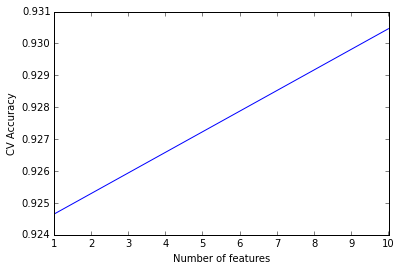

In [146]:
#find the best value of K with chi2
#use random forest as the base estimator
#we will use the default parameters
x_range = (1,10)
rfc = RandomForestClassifier()
all_scores = []
for i in x_range:
    best_x = SelectKBest(chi2, k = i).fit_transform(X, y)
    scores = cross_val_score(rfc, best_x, y, cv = 10, scoring = 'accuracy')
    all_scores.append(scores.mean())
    
%matplotlib inline
plt.plot(x_range, all_scores)
plt.xlabel('Number of features')
plt.ylabel('CV Accuracy')

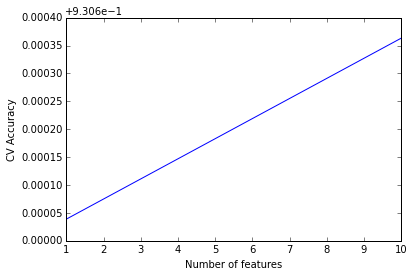

In [147]:
#find the best value of K with f_classif
x_range = (1,10)
rfc = RandomForestClassifier()
all_scores = []
for i in x_range:
    best_x = SelectKBest(f_classif, k = i).fit_transform(X, y)
    scores = cross_val_score(rfc, best_x, y, cv = 10, scoring = 'accuracy')
    all_scores.append(scores.mean())
    
%matplotlib inline
plt.plot(x_range, all_scores)
plt.xlabel('Number of features')
plt.ylabel('CV Accuracy')

Both graph suggested that using the maximum number of features would yeild the best accuracy!

<h3>Another appraoch: Removing features with low variance </h3><br> 
<b>Remove all features that are either one or zero (on or off) in more than 80% of the samples </b>

In [153]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)
print X.shape

(120269, 10)


The shape of X stayed the same. No features was removed after all and all of their variance were above the threshold.<br>
I think that it is reasonable to keep all features for model prediction. Although my plan was to proceed model evaluation with selected features, it wouldn't be necessary to go any further.  

<h2> Results </h2><br>
Besides Gaussian NB, Bagging (with GNB as base estimator) and SVM Gaussian Kernel, all models had higher accuracies than the null model which was 0.930514. As far as the AUC measure, all models had greater AUC than the null model which was 0.5. Random Forest had the best predictability; its 10-fold cross-validation accuracy was 0.934048 and AUC was 0.851587. The cross-validation computation of all models except SVM Gaussian Kernel could be finished within a minute. The SVM model took nearly 20 hours to finish the 10-fold cross-validation, but its predictive performace was nearly the worst among all models. I also estimated the importance of each feature using the best model Random Forest. Results showed that each feature was making at least some contribution to model prediction, where the scores of feature importances varid from 0.009875 to 0.295248. After using the SelectKBest method to produce the <i>CV accuracy</i> vs. <i> number of selected features </i> plots, both plots suggested to keep the maximum number of features for the greatest accuracy. I also tried to remove features with variance lower than <i>0.8*(1-0.8)</i>, but none of the features was lower than this threshold. Therefore, I thought that it would be a good stopping point for my analysis and wouldn't proceed the model evaluations with model selection. 